In [164]:
!pip install matplotlib==3.1.0

shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
The folder you are executing pip from can no longer be found.


In [165]:
import numpy
import pandas
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sns
sns.set()
import os, sys, itertools, re
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.neighbors import kneighbors_graph
import networkx as nx
from sklearn.cluster import KMeans
from pandas import Series, DataFrame

In [ ]:


if 'google.colab' in sys.modules:    
    project_path =  "/content/drive/MyDrive/"
    
    from google.colab import drive
    
    drive.mount('/content/drive/', force_remount=True)
    sys.path.append(project_path)
    %cd $project_path

In [ ]:
data = pd.read_csv("iris.csv")
data.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
#TYPE OF DATASET
print(type(data))


<class 'pandas.core.frame.DataFrame'>


In [ ]:
## NUMBER OF ROWS AND COLUMNS
print(data.shape)

(150, 5)


In [ ]:
## CLASS DISTRIBUTION
print(data.groupby('Name').size())

Name
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


In [ ]:
## DATASET INDEX
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SepalLength  150 non-null    float64
 1   SepalWidth   150 non-null    float64
 2   PetalLength  150 non-null    float64
 3   PetalWidth   150 non-null    float64
 4   Name         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [ ]:
##  PIVOT TABLE
print(data.pivot_table(index='Name', values=['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth'], aggfunc=np.mean))#pivot table with their means

                 PetalLength  PetalWidth  SepalLength  SepalWidth
Name                                                             
Iris-setosa            1.464       0.244        5.006       3.418
Iris-versicolor        4.260       1.326        5.936       2.770
Iris-virginica         5.552       2.026        6.588       2.974


In [ ]:
# DATA DESCRIPTION
print(data.describe())  # count, mean, minimun/maximum values and percentiles.

       SepalLength  SepalWidth  PetalLength  PetalWidth
count   150.000000  150.000000   150.000000  150.000000
mean      5.843333    3.054000     3.758667    1.198667
std       0.828066    0.433594     1.764420    0.763161
min       4.300000    2.000000     1.000000    0.100000
25%       5.100000    2.800000     1.600000    0.300000
50%       5.800000    3.000000     4.350000    1.300000
75%       6.400000    3.300000     5.100000    1.800000
max       7.900000    4.400000     6.900000    2.500000


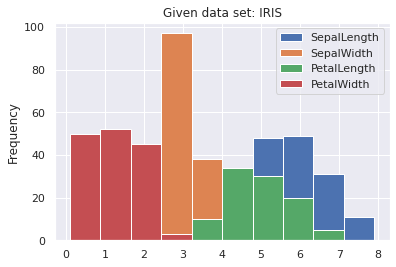

In [ ]:
#plotting the data frame and displaying plotted graph
data.plot(kind="hist") 
plt.title('Given data set: IRIS')
plt.savefig('iris_data.png')  
plt.show()  

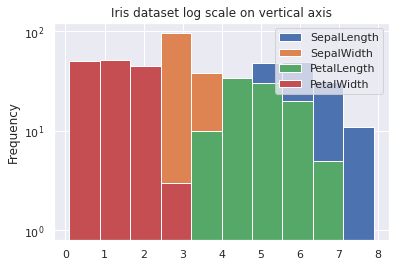

In [ ]:

# Histogram displaying all attributes Y axis on log scale and displaying the graph
data.plot(kind="hist")
plt.yscale('log') 
plt.title('Iris dataset log scale on vertical axis')
plt.savefig('iris.log_verticalaxis.png') 
plt.show()  

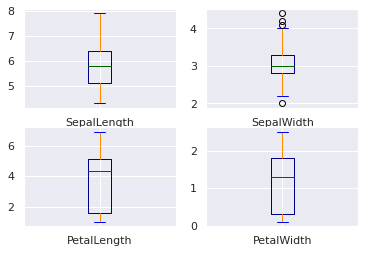

In [ ]:

color = dict(boxes='DarkBlue', whiskers='DarkOrange',medians='DarkGreen', caps='Blue')#colors
data.plot(kind='box', subplots=True, layout=(2, 2), sharex=False, sharey=False, color=color)#plot type box
plt.savefig('iris_box_and_whisker_plot.png') #save the plot
plt.show() #show the plot

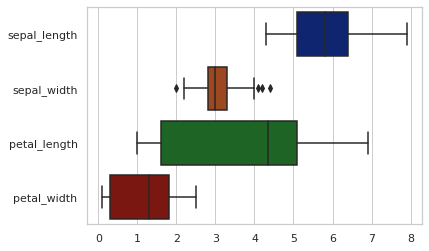

In [ ]:
#loading dataset via seaborn, plotting box plot and save the plot
iris = sns.load_dataset("iris") 
ax = sns.boxplot(data=iris, orient="h", palette="dark") 
fig=ax.get_figure()
fig.savefig("iris_box_plot.png")

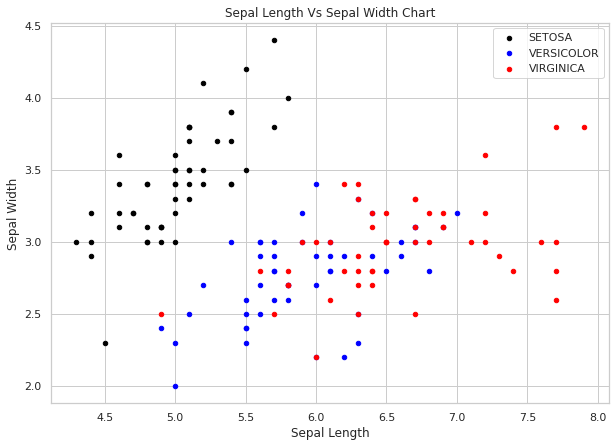

In [ ]:
fig = data[data.Name == 'Iris-setosa'].plot(kind='scatter', x='SepalLength', y='SepalWidth', color='black', label='SETOSA')
data[data.Name == 'Iris-versicolor'].plot(kind='scatter', x='SepalLength', y='SepalWidth', color='blue', label='VERSICOLOR', ax=fig)
data[data.Name == 'Iris-virginica'].plot(kind='scatter', x='SepalLength', y='SepalWidth', color='red', label='VIRGINICA', ax=fig)
fig.set_xlabel('Sepal Length')
fig.set_ylabel('Sepal Width')
fig.set_title('Sepal Length Vs Sepal Width Chart')
fig=plt.gcf()
fig.set_size_inches(10, 7)
plt.show()

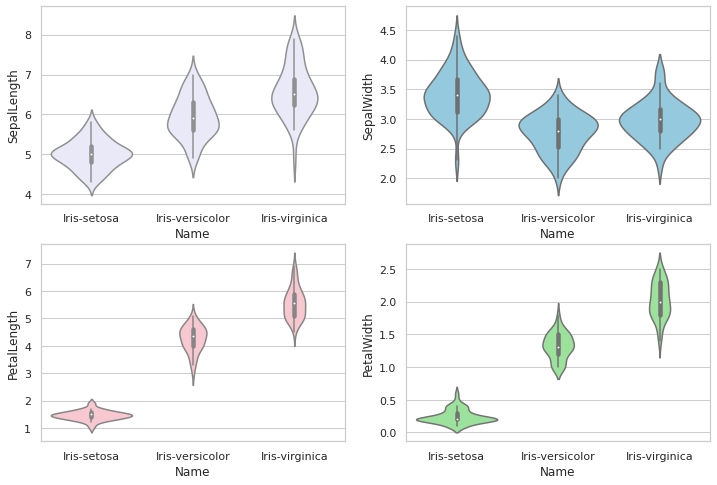

In [ ]:

sns.set_theme(style="whitegrid")
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.violinplot(x='Name', y = 'SepalLength', data=data,color='lavender')
plt.subplot(2,2,2)
sns.violinplot(x='Name', y = 'SepalWidth', data=data,color='skyblue')
plt.subplot(2,2,3)
sns.violinplot(x='Name', y = 'PetalLength', data=data,color='pink')
plt.subplot(2,2,4)
sns.violinplot(x='Name', y = 'PetalWidth', data=data,color='lightgreen')

In [ ]:
data_corr = data.corr()
data_corr

,SepalLength,SepalWidth,PetalLength,PetalWidth
SepalLength,1.000000,-0.109369,0.871754,0.817954
SepalWidth,-0.109369,1.000000,-0.420516,-0.356544
PetalLength,0.871754,-0.420516,1.000000,0.962757
PetalWidth,0.817954,-0.356544,0.962757,1.000000


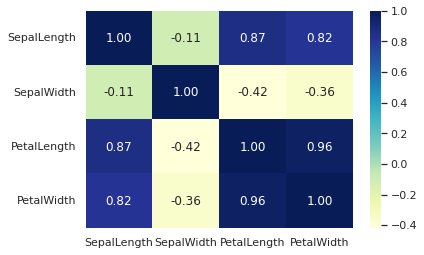

In [ ]:
sns.heatmap(data=data_corr, cmap='YlGnBu', annot=True, fmt='.2f')
plt.show()

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD,Adam

In [ ]:
#Splitting the data into training and test test
X = data.iloc[:,:-1].values
y = data.iloc[:,-1:].values


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()
y1 = encoder.fit_transform(y)

Y = pd.get_dummies(y1).values


from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42) 

In [ ]:
from sklearn.neural_network import MLPClassifier
lr = MLPClassifier()
lr.fit(X_train,y_train)


MLPClassifier()

In [ ]:
#importing the metrics and performance on training and testing data set
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics, preprocessing, svm
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
pred_lr=lr.predict(X_test) 
print('Performance on training data using LR:',lr.score(X_train,y_train))
print('Performance on testing data using LR:',lr.score(X_test,y_test))
print('MSE: ',metrics.mean_squared_error(y_test, pred_lr))
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_test,pred_lr)))
#Evaluate the model using accuracy
lr_acc=metrics.r2_score(y_test,pred_lr)
print('Accuracy LR_pipeline: ',lr_acc)
mse_lr= mean_squared_error(y_test, pred_lr)
print(mse_lr)

Performance on training data using LR: 0.6666666666666666
Performance on testing data using LR: 0.7
MSE:  0.09999999999999999
RMSE:  0.31622776601683794
Accuracy LR_pipeline:  0.5238095238095236
0.09999999999999999


In [ ]:
import warnings

warnings.filterwarnings("ignore")

In [ ]:
param_grid = {
    'hidden_layer_sizes':[10,15,100,200],
    'activation': ['relu','tanh'],
    'solver': ['adam'],
    'alpha': [0,0.0005,0.0001,0.0005,0.001],
    'learning_rate_init': [0.005,0.01],
    'max_iter': [200,500],
    'shuffle': [True,False] 
}

gridSearch = GridSearchCV(MLPClassifier(), param_grid, cv=cv,scoring='recall',verbose=2)
gridSearch.fit(X_train, y_train)
print('Score: ', gridSearch.best_score_)
print('Parameters: ', gridSearch.best_params_)

In [ ]:
#importing the metrics
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics, preprocessing, svm
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
lr = MLPClassifier(activation ='relu', alpha= 0, hidden_layer_sizes=10, learning_rate_init= 0.005, max_iter= 200, shuffle=True, solver='adam',random_state=420)
lr.fit(X_train,y_train)
pred_lr=lr.predict(X_test) 
print('Performance on training data using LR:',lr.score(X_train,y_train))
print('Performance on testing data using LR:',lr.score(X_test,y_test))
print('MSE: ',metrics.mean_squared_error(y_test, pred_lr))
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_test,pred_lr)))
#Evaluating the accuracy via the model being used
lr_acc=metrics.r2_score(y_test,pred_lr)
print('Accuracy LR_pipeline: ',lr_acc)
mse_lr= mean_squared_error(y_test, pred_lr)
print(mse_lr)  

Performance on training data using LR: 0.9666666666666667
Performance on testing data using LR: 1.0
MSE:  0.0
RMSE:  0.0
Accuracy LR_pipeline:  1.0
0.0


In [ ]:
#importing the metrics
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics, preprocessing, svm
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
lr = MLPClassifier(activation ='relu', alpha= 0, hidden_layer_sizes=10, learning_rate_init= 0.005, max_iter= 200, shuffle=True, solver='adam',random_state=419)
lr.fit(X_train,y_train)
pred_lr=lr.predict(X_test) 
print('Performance on training data using LR:',lr.score(X_train,y_train))
print('Performance on testing data using LR:',lr.score(X_test,y_test))
print('MSE: ',metrics.mean_squared_error(y_test, pred_lr))
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_test,pred_lr)))
lr_acc=metrics.r2_score(y_test,pred_lr)
print('Accuracy LR_pipeline: ',lr_acc)
mse_lr= mean_squared_error(y_test, pred_lr)
print(mse_lr)  

Performance on training data using LR: 0.975
Performance on testing data using LR: 0.9666666666666667
MSE:  0.022222222222222223
RMSE:  0.14907119849998599
Accuracy LR_pipeline:  0.899243057137794
0.022222222222222223


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

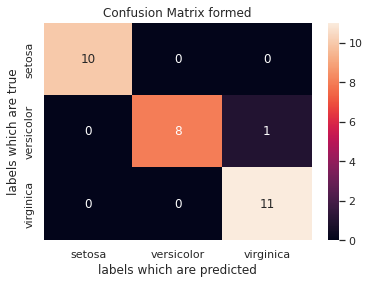

In [ ]:
import seaborn as sns

T5_lables = ['setosa',"versicolor","virginica"]    

ax= plt.subplot()

cnf_matrix = confusion_matrix(np.asarray(y_test).argmax(axis=1), np.asarray(pred_lr).argmax(axis=1))
sns.heatmap(cnf_matrix, annot=True, fmt='g', ax=ax); 
ax.set_xlabel('labels which are predicted');ax.set_ylabel('labels which are true'); 
ax.set_title('Confusion Matrix formed'); 
ax.xaxis.set_ticklabels(T5_lables); ax.yaxis.set_ticklabels(T5_lables);

In [ ]:
#Predicted value and its accuracy
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,pred_lr))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

   micro avg       0.97      0.97      0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30
 samples avg       0.97      0.97      0.97        30



In [ ]:
# Sensitivity, hit rate, recall, or true positive rate

FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix) 
FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TP = np.diag(cnf_matrix)
TN = cnf_matrix.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

TPR = TP/(TP+FN)
print("SENSITIVITY : ", TPR)

TNR = TN/(TN+FP) 
print("SPECIFICITY : ", TNR)

PPV = TP/(TP+FP)
print("PRECESION: ", PPV)

FPR = FP/(FP+TN)
print("FALSE POSITIVE RATE: ", FPR)

FNR = FN/(TP+FN)
print("FALSE NEGATIVE RATE: ", FNR)

ACC = (TP+TN)/(TP+FP+FN+TN)
print("ACCURACY FOR EACH CLASS: ", ACC)

SENSITIVITY :  [1.         0.88888889 1.        ]
SPECIFICITY :  [1.         1.         0.94736842]
PRECESION:  [1.         1.         0.91666667]
FALSE POSITIVE RATE:  [0.         0.         0.05263158]
FALSE NEGATIVE RATE:  [0.         0.11111111 0.        ]
ACCURACY FOR EACH CLASS:  [1.         0.96666667 0.96666667]


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred_lr)

1.0

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
#roc auc score
roc_auc_score(y_test, pred_lr, multi_class='ovo', average='weighted')


1.0

In [ ]:
#Precision of each label
from sklearn import metrics
print("None ", metrics.precision_score(y_test,pred_lr, average=None)) 

None  [1. 1. 1.]


In [ ]:
from sklearn.metrics import roc_curve, auc
pred = lr.predict(X_test)
pred = np.argmax(pred,axis=1)

In [ ]:
pred

array([1, 0, 2, 1, 1, 0, 1, 2, 2, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [ ]:
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import roc_curve, auc

In [ ]:

lw = 2
n_classes=3

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i]= roc_curve (y_test[:, i], pred_lr[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), pred_lr.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

plt.figure(1)
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()



In [ ]:
#importing the K fold
from sklearn.model_selection import KFold
num_folds = 5
kfold = KFold(n_splits=num_folds, random_state=420,shuffle=True)
results_clf1 = cross_val_score(lr,X, y, cv=kfold)

accuracy_clf1=np.mean(abs(results_clf1))
print('Average accuracy: ',accuracy_clf1)
print('Standard Deviation: ',results_clf1.std())

Average accuracy:  0.9800000000000001
Standard Deviation:  0.01632993161855452
